# Below I have created a model to predict Gender using CNN

In [1]:
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, GaussianNoise
from keras.models import load_model
import tensorflow as tf
from sklearn.model_selection import train_test_split
import time
import datetime
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

Using TensorFlow backend.


# Final.csv contains my edited csv file

In [4]:
df = pd.read_csv('Final.csv',error_bad_lines=False)

In [ ]:
temp = df['gender'].isnull()
index = []
for i in range(len(df)):
    if temp[i]:
        index.append(df['files'][i])

In [9]:
index

[]

In [11]:
df.gender.value_counts()

Men       21330
Women     16403
Unisex     1965
Boys        802
Girls       627
Name: gender, dtype: int64

In [12]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,files
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


# Below I have developed a cnn model to predict gender

In [65]:
X = df['files']
y= df['gender']


In [66]:
X.head()

0    15970.jpg
1    39386.jpg
2    59263.jpg
3    21379.jpg
4    53759.jpg
Name: files, dtype: object

In [59]:
y.head()

0      Men
1      Men
2    Women
3      Men
4      Men
Name: gender, dtype: object

In [67]:
y = y.astype('str')

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [69]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                            zoom_range = 0.3
                            )

In [70]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [73]:
X = pd.concat([X_train, y_train], axis=1)

In [75]:
test = pd.concat([X_test, y_test], axis=1)

In [1]:
test = test.reset_index()
test.drop(['index'], axis =1, inplace = True)
test.head()

NameError: name 'test' is not defined

In [80]:
X = X.reset_index()
X.drop(['index'], axis = 1, inplace = True)
X.head()

,files,gender
0,21987.jpg,Women
1,6755.jpg,Men
2,35684.jpg,Men
3,19098.jpg,Women
4,19431.jpg,Men


In [83]:
train_data = train_datagen.flow_from_dataframe(dataframe=X, directory='images/',x_col = 'files', y_col = 'gender', target_size = (64,64))

Found 27555 validated image filenames belonging to 5 classes.


In [84]:
test_data = test_datagen.flow_from_dataframe(dataframe=test, directory='images/',x_col = 'files', y_col = 'gender', target_size = (64,64))

Found 13572 validated image filenames belonging to 5 classes.


In [102]:
cnn = Sequential()

In [103]:
cnn.add(Conv2D(filters = 8, kernel_size = (3,3) ,strides = (1,1),padding = 'same', input_shape = (64,64,3), activation = 'relu'))
cnn.add(Conv2D(filters = 16, kernel_size = (3,3) ,strides = (1,1), input_shape = (64,64,8), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size = (3,3), strides = (1,1)))
cnn.add(Flatten())
cnn.add(Dense(120, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(5,activation = 'softmax'))


In [104]:
cnn.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [105]:
start = time.time()
history = cnn.fit_generator(
    train_data,
    epochs=1,
    validation_data=test_data,
)
end = time.time()
print('Processing time:',(end - start)/60)

Epoch 1/1
862/862 [==============================] - 893s 1s/step - loss: 0.2495 - accuracy: 0.8970 - val_loss: 0.1830 - val_accuracy: 0.9291
Processing time: 14.907430016994477


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


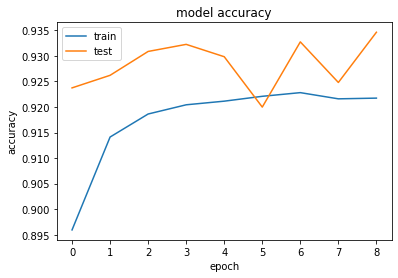

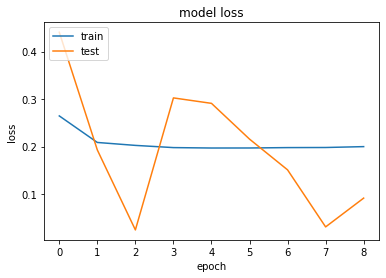

In [40]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
cnn.save('gender_model.h5')

In [85]:
model = load_model('gender_model.h5')

In [31]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 8)         224       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 60, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 120)               6912120   
_________________________________________________________________
dropout_9 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 5)               

# Prediction made on above cnn model

In [95]:
test_steps_per_epoch = np.math.ceil(test_data.samples / test_data.batch_size)


In [97]:
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())   

In [100]:
accuracy_score(true_classes, predicted_classes)

0.4649277925139994

In [96]:
predictions = model.predict(test_data)

In [98]:
predicted_classes = np.argmax(predictions, axis=1)

In [99]:
confusion = confusion_matrix(true_classes, predicted_classes)
print(confusion)

[[   7    1  158    5   87]
 [   1    0  141    4   67]
 [  93   35 4394  109 2425]
 [  16    3  368   11  242]
 [  94   28 3294   91 1898]]


In [49]:
confusion = confusion_matrix(true_classes, predicted_classes)
print(confusion)

[[   2    0  157    3   96]
 [   2    2  131    2   76]
 [ 103   33 4355  115 2450]
 [   6    4  395   10  225]
 [  98   28 3317   90 1872]]


In [ ]:
test_steps_per_epoch = np.math.ceil(train_data.samples / train_data.batch_size)


In [46]:
true_classes = train_data.classes
class_labels = list(test_data.class_indices.keys())   

# Evaluting above model

In [84]:
model_evaluate=model.evaluate_generator(generator=test_data)

In [85]:
print('Test loss:', model_evaluate[0])
print('Test accuracy:', model_evaluate[1])

Test loss: 0.12006067484617233
Test accuracy: 0.9318007826805115


# Extracting feautures from the above model

In [96]:
intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer('dropout_9').output)
intermediate_layer_model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9_input (InputLayer)  (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 8)         224       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 60, 60, 16)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_17 (Dense)             (None, 120)               6912120   
_________________________________________________________________
dropout_9 (Dropout)          (None, 120)               0   

In [97]:
feauture_engg_data = intermediate_layer_model.predict(train_data)
feauture_engg_data = pd.DataFrame(feauture_engg_data)

In [98]:
feauture_engg_data.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.879215,0.0,0.0,...,0.0,2.112425,0.0,0.0,0.268779,0.0,0.0,2.491130,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.265721,0.0,0.0,...,0.0,0.029080,0.0,0.0,0.000000,0.0,0.0,6.757486,7.633764,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.046899,0.0,0.0,...,0.0,1.014900,0.0,0.0,0.000000,0.0,0.0,6.036207,5.060493,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.330296,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.572004,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.605489,0.0,0.0,...,0.0,2.548357,0.0,0.0,0.343704,0.0,0.0,2.397275,0.000000,0.0


In [99]:
feauture_test = intermediate_layer_model.predict(test_data)
feauture_test = pd.DataFrame(feauture_test)

In [100]:
feauture_engg_data = pd.concat([X, feauture_engg_data], axis = 1)
feauture_test = pd.concat([test, feauture_test], axis = 1)

In [104]:
feauture_test.to_csv('feauture_test_gender.csv')

In [105]:
feauture_engg_data.to_csv('feauture_engg_data_gender.csv')

In [32]:
feauture_engg_data = pd.read_csv('feauture_engg_data_gender.csv')

In [33]:
feauture_test = pd.read_csv('feauture_test_gender.csv')